# Fisher Linear Discriminant

In this exercise, we apply Fisher Linear Discriminant as described in Chapter 3.8.2 of Duda et al. on the UCI Abalone dataset. A description of the dataset is given at the page https://archive.ics.uci.edu/ml/datasets/Abalone. The following two methods are provided for your convenience: 


* **`utils.Abalone.__init__(self)`** reads the Abalone data and instantiates two data matrices corresponding to: *infant (I)*, *non-infant (N)*.


* **`utils.Abalone.plot(self,w)`** produces a histogram of the data when projected onto a vector `w`, and where each class is shown in a different color.


Sample code that makes use of these two methods is given below. It loads the data, looks at the shape of instantiated matrices, and plots the projection on the first dimension of the data representing the length of the abalone.

(1342, 7) (2835, 7)


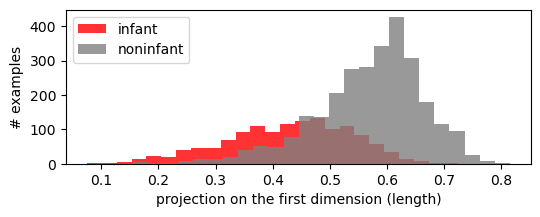

In [1]:
%matplotlib inline
import utils,numpy

# Load the data
abalone = utils.Abalone()

# Print dataset size for each class
print(abalone.I.shape, abalone.N.shape)

# Project data on the first dimension
w1 = numpy.array([1,0,0,0,0,0,0])
abalone.plot(w1,'projection on the first dimension (length)')

## Implementation (10 + 5 + 5 = 20 P)

* **Create a function `w = fisher(X1,X2)` that takes as input the data for two classes and returns the Fisher linear discriminant.**


* **Create a function `objective(X1,X2,w)` that evaluates the objective defined in Equation 96 of Duda et al. for an arbitrary projection vector `w`.**


* **Create a function `z = phi(X)` that returns a quadratic expansion for each data point `x` in the dataset. Such expansion consists of the vector `x` itself, to which we concatenate the vector of all pairwise products between elements of `x`.** In other words, letting $x = (x_1,\dots,x_d)$ denote the $d$-dimensional data point, the quadratic expansion for this data point is a $d \cdot (d+3)/2$ dimensional vector given by $\phi(x) = (x_i)_{1 \leq i \leq d} \cup (x_i x_j)_{1 \leq i \leq j \leq d}$. For example, the quadratic expansion for $d=2$ is $(x_1,x_2,x_1^2,x_2^2,x_1 x_2)$.

In [2]:
import numpy as np

# implement S_w
def S_w(X):
    z = X-np.mean(X,axis=0)
    return np.dot(z.T,z)

def fisher(X1,X2):
    s_w = S_w(X1) + S_w(X2)
    d_m = np.mean(X2,axis=0) - np.mean(X1,axis=0)        # d_m = (mu_2 - mu_1)
    w_new = np.dot(np.linalg.inv(s_w),d_m)               # w = inv(s_w) * d_m
    w = w_new / np.linalg.norm(w_new)                    # normalize w
    return w
    
def objective(X1,X2,w):
    ##### Replace by your code
    d_m = np.mean(X2,axis=0) - np.mean(X1,axis=0)        # d_m = (mu_2 - mu_1)
    s_w = S_w(X1) + S_w(X2)
    w_sb_w = (w.dot(d_m))**2
    w_sw_w = w.T.dot(s_w).dot(w)                            # w.T * s_w * w
    return w_sb_w/w_sw_w

    #####
    
def expand(X):
    ##### Replace by your code
    """
    Returns a quadratic expansion for each data point x in X.
    """
    n, d = X.shape                    # n = number of data points, d = dimension
    X_expanded = np.zeros((n, d*(d+3)/2))    # initialize expanded data matrix with zeros (n x d*(d+1)/2), where d*(d+3)/2 = number of features
    for i in range(n):
        x = X[i]                                  # x = data point
        x_expanded = np.concatenate([x, np.outer(x,x).flatten()])    # x_expanded = [x, x*x.T], where x*x.T = outer product of x & flattened x is a vector of all elements in x*x.T
        X_expanded[i] = x_expanded
    return X_expanded 
    #####

## Analysis (5 + 5 = 10 P)

* **Print value of the objective function and the histogram for several values of `w`:**

  * `w` is a canonical coordinate vector for the first feature (length).
  * `w` is the difference between the mean vectors of the two classes.
  * `w` is the Fisher linear discriminant.
  * `w` is the Fisher linear discriminant (after quadratic expansion of the data).

Fisher discriminant vector: 0.0005691815990406624


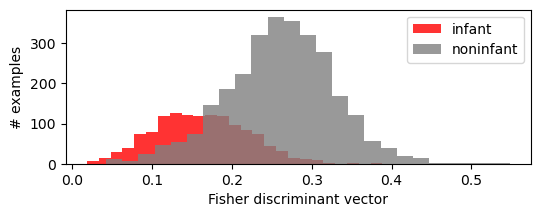

In [4]:
##### REPLACE BY YOUR CODE
%matplotlib inline

data = utils.Abalone()

# 







# w = fisher discriminant vector
w = fisher(data.I,data.N)         
print('Fisher discriminant:', objective(data.I,data.N,w))
data.plot(w,'Fisher Linear discriminant')
#####